# TD de régression - Partie 2 - Régression polynomiale

**Objectif de ce Notebook :**

Entrainer des modèles de **régression polynomiale**

**Mots-clés :**

- **Régression polynomiale**
- **Erreur quadratique moyenne (MSE)**
- **Erreur absolue moyenne (MAE)**

**Ressources :**

- [Erreur absolue moyenne (MAE)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html)

## Régression polynomiale

💻 Importer les bibliothèques nécessaires à l'activité

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score, make_scorer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

💻 Créer un jeu de **10 données** à partir d'une **sinusoïde bruitée**

In [2]:
np.random.seed(0)
n_samples = 10
X_poly = np.linspace(0, 1, n_samples).reshape(-1, 1)
y_poly = np.sin(2 * np.pi * X_poly).ravel() + np.random.normal(scale=0.1, size=n_samples)

# Visualisation des données
plt.scatter(X_poly, y_poly, color='black', label='Données')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Illustration du compromis biais-variance')
plt.show()

💻 Entrainer 9 modèles de régression polynomiale avec un degré allant de 1 à 9. Afficher le résultat sur un graphique

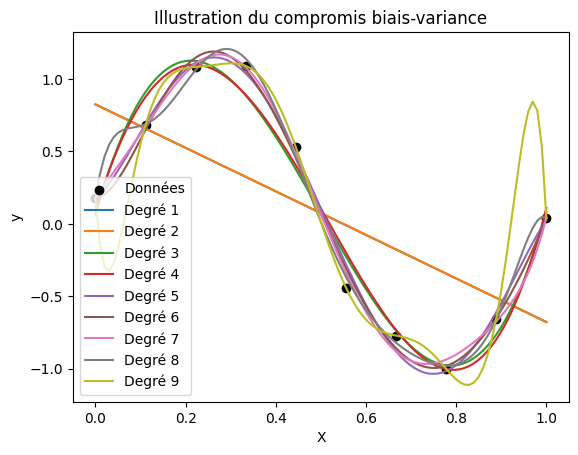

In [3]:
plt.scatter(X_poly, y_poly, color='black', label='Données')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Illustration du compromis biais-variance')

# Ajustement et visualisation des modèles de régression polynomiale
degrees = range(1, 10)
x_plot = np.linspace(0, 1, 100).reshape(-1, 1)

for degree in degrees:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_poly, y_poly)
    y_plot = model.predict(x_plot)
    plt.plot(x_plot, y_plot, label=f'Degré {degree}')

plt.legend()
plt.show()

💻 Tracer la **courbe de la RMSE** en fonction du **degré du polynome**

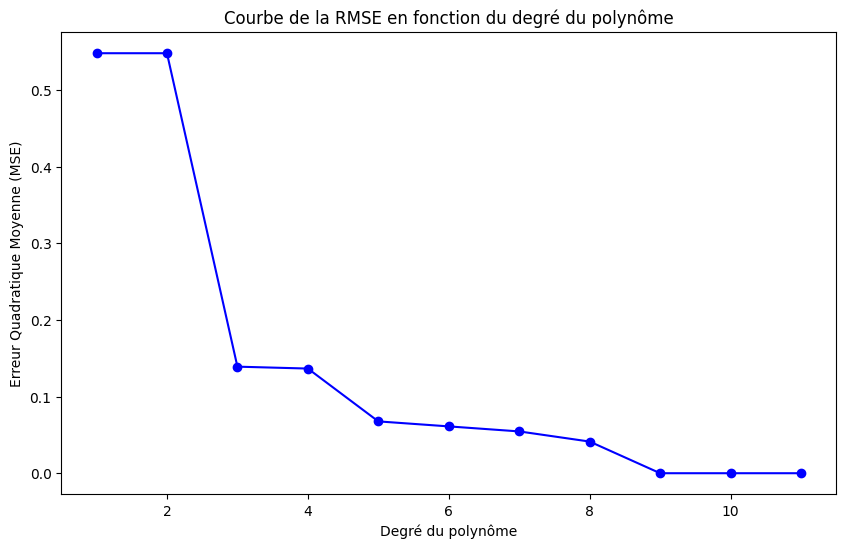

In [4]:
degrees = range(1, 12)
rmse_list = []

for degree in degrees:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_poly, y_poly)
    y_pred = model.predict(X_poly)
    rmse = root_mean_squared_error(y_poly, y_pred)
    rmse_list.append(rmse)

plt.figure(figsize=(10, 6))
plt.plot(degrees, rmse_list, marker='o', linestyle='-', color='b')
plt.xlabel('Degré du polynôme')
plt.ylabel('Erreur Quadratique Moyenne (MSE)')
plt.title('Courbe de la RMSE en fonction du degré du polynôme')
plt.show()

💻 Créer un jeu de données **plus important (50 données)**. Séparer ce jeu en un jeu d'entrainement et un jeu de test

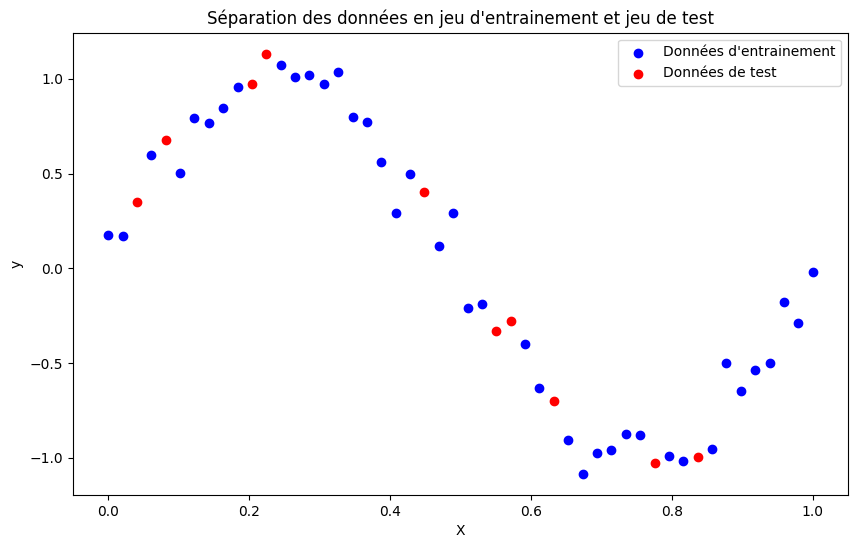

In [5]:
np.random.seed(0)
n_samples = 50
X_poly = np.linspace(0, 1, n_samples).reshape(-1, 1)
y_poly = np.sin(2 * np.pi * X_poly).ravel() + np.random.normal(scale=0.1, size=n_samples)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y_poly, test_size=0.2, random_state=0)

plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Données d\'entrainement')
plt.scatter(X_test, y_test, color='red', label='Données de test')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Séparation des données en jeu d\'entrainement et jeu de test')
plt.legend()
plt.show()

💻 Tracer la **courbe de la RMSE** en fonction du **degré du polynome** pour le jeu d'entrainement et de test

In [6]:
degrees = range(1, 30)
rmse_train_list = []
rmse_test_list = []

for degree in degrees:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    
    # Prédictions et calcul de la RMSE pour le jeu d'entraînement
    y_train_pred = model.predict(X_train)
    rmse_train = root_mean_squared_error(y_train, y_train_pred)
    rmse_train_list.append(rmse_train)
    
    # Prédictions et calcul de la RMSE pour le jeu de test
    y_test_pred = model.predict(X_test)
    rmse_test = root_mean_squared_error(y_test, y_test_pred)
    rmse_test_list.append(rmse_test)

plt.figure(figsize=(10, 6))
plt.plot(degrees, rmse_train_list, marker='o', linestyle='-', color='b', label='RMSE Entrainement')
plt.plot(degrees, rmse_test_list, marker='o', linestyle='-', color='r', label='RMSE Test')
plt.xlabel('Degré du polynôme')
plt.ylabel('Erreur Quadratique Moyenne (RMSE)')
plt.title('Courbe de la RMSE en fonction du degré du polynôme')
plt.legend()
plt.show()

💻 A l'aide d'une **recherche par grille**, le **degré du polynome** qui donne le **meilleur résultat**

In [9]:
param_grid = {'polynomialfeatures__degree': range(1, 30)}
pipeline = make_pipeline(PolynomialFeatures(), LinearRegression())
scorer = make_scorer(root_mean_squared_error, greater_is_better=False)
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring=scorer)
grid_search.fit(X_train, y_train)
best_degree = grid_search.best_params_['polynomialfeatures__degree']
print(f"Meilleur degré trouvé : {best_degree}")

best_model = grid_search.best_estimator_
y_train_pred = best_model.predict(X_train)
rmse_train = root_mean_squared_error(y_train, y_train_pred)
y_test_pred = best_model.predict(X_test)
rmse_test = root_mean_squared_error(y_test, y_test_pred)
print(f"RMSE pour le jeu d'entraînement : {rmse_train}")
print(f"RMSE pour le jeu de test : {rmse_test}")

Meilleur degré trouvé : 5
RMSE pour le jeu d'entraînement : 0.10725222685884521
RMSE pour le jeu de test : 0.09017592629512378
